Default RF accuracy (n_estimators=10): 1.0000
Best RF accuracy: 1.0000 with n_estimators=1


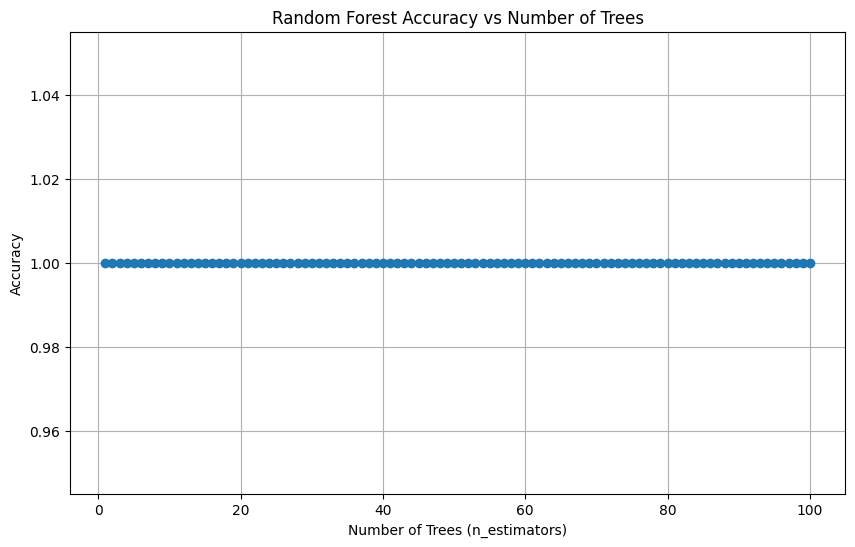

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/iris (1).csv')

# Prepare features and target
X = df.drop(columns=['species'])  # Assuming 'species' is the target column
y = df['species']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Random Forest with default n_estimators (10)
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)

# Measure accuracy
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default RF accuracy (n_estimators=10): {default_score:.4f}")

# Fine-tune the number of trees
scores = []
n_range = range(1, 101)

for n in n_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Find the best score and number of trees
best_score = max(scores)
best_n = n_range[scores.index(best_score)]
print(f"Best RF accuracy: {best_score:.4f} with n_estimators={best_n}")

# Optional: Plot accuracy vs number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_range, scores, marker='o')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
